# Cytoreason Data Science Task

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
metadata = pd.read_csv('meta_data.csv')

In [4]:
len(metadata)

86

In [5]:
# Count the unique SampleIDs in metadata
unique_samples = metadata['SampleID'].nunique()
print("Number of unique SampleIDs in metadata:", unique_samples)

Number of unique SampleIDs in metadata: 86


In [6]:
# 1. Set the gene identifier as the index.
df.set_index('ID_REF', inplace=True)

# 2. Transpose the gene-expression table so that each row is a sample
#    and each column is a gene.
df_transposed = df.transpose()

# 3. The index of df_transposed now contains sample IDs (e.g. GSM381194),
#    but need a column for merging:
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'SampleID'}, inplace=True)

# 4. Merge with the metadata (which should have a 'SampleID' column).
merged_df = pd.merge(df_transposed, metadata, on='SampleID', how='inner')

# Now merged_df has each sample on a single row, 
# all the gene-expression columns, and the metadata columns.

In [7]:
merged_df.head()

,SampleID,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Tissue,disease state,protocol,disease activity score (das28),Response status,Gender
0,GSM381194,2.377898,7.109049,9.630326,2.331110,2.326892,7.145603,3.134364,2.374527,9.394731,...,2.389734,2.391520,2.372542,2.383567,whole blood,rheumatoid arthritis,anti_TNF therapy,4.51,Responder,Male
1,GSM381195,2.378662,5.156438,8.871972,2.337406,2.325880,6.724430,3.132534,2.371931,8.343010,...,2.389150,2.388430,2.371702,2.383306,whole blood,rheumatoid arthritis,anti_TNF therapy,6.04,Non_responder,Female
2,GSM381196,2.382631,5.321988,8.348816,2.334704,2.326533,6.856559,2.996339,2.373904,8.742820,...,2.389496,2.390634,2.373524,2.384077,whole blood,rheumatoid arthritis,anti_TNF therapy,5.92,Non_responder,Male
3,GSM381197,2.378621,5.195298,9.557484,2.643543,2.330819,7.046044,3.092153,2.464753,9.732182,...,2.395262,2.399168,2.382912,2.396485,whole blood,rheumatoid arthritis,anti_TNF therapy,4.48,NaN,Female
4,GSM381198,2.461926,5.980662,8.807910,2.334267,2.327032,7.758407,3.444969,2.375944,9.125310,...,2.389583,2.392193,2.373700,2.384135,whole blood,rheumatoid arthritis,anti_TNF therapy,6.00,Non_responder,Female


## Exploritory Data Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Jupyter to show plots inline
%matplotlib inline

In [9]:
# Overview of metadata
print("Metadata Info:")
metadata.info()

# Summary statistics (includes categorical data)
print("\nMetadata Summary:")
display(metadata.describe(include='all'))

# Count unique SampleIDs
unique_samples = metadata['SampleID'].nunique()
print("Number of unique SampleIDs in metadata:", unique_samples)


Metadata Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SampleID                        86 non-null     object 
 1   Tissue                          86 non-null     object 
 2   disease state                   86 non-null     object 
 3   protocol                        86 non-null     object 
 4   disease activity score (das28)  80 non-null     float64
 5   Response status                 46 non-null     object 
 6   Gender                          86 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.8+ KB

Metadata Summary:


,SampleID,Tissue,disease state,protocol,disease activity score (das28),Response status,Gender
count,86,86,86,86,80.000000,46,86
unique,86,1,1,1,NaN,2,2
top,GSM381194,whole blood,rheumatoid arthritis,anti_TNF therapy,NaN,Responder,Female
freq,1,86,86,86,NaN,24,44
mean,NaN,NaN,NaN,NaN,5.233875,NaN,NaN
std,NaN,NaN,NaN,NaN,0.843616,NaN,NaN
min,NaN,NaN,NaN,NaN,2.720000,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.622500,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.230000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.922500,NaN,NaN


Number of unique SampleIDs in metadata: 86


Missing values in metadata:
SampleID                           0
Tissue                             0
disease state                      0
protocol                           0
disease activity score (das28)     6
Response status                   40
Gender                             0
dtype: int64


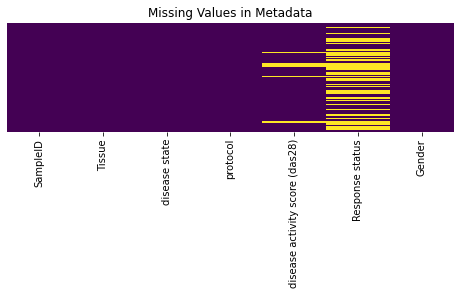

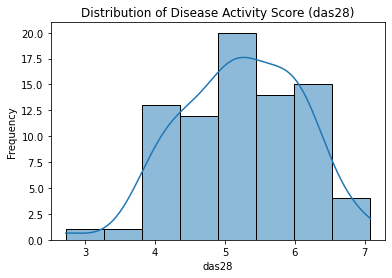

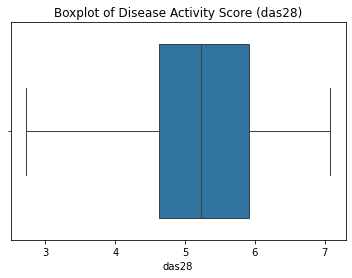

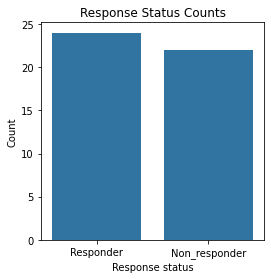

In [10]:
# Check and visualize missing values in metadata
print("Missing values in metadata:")
print(metadata.isnull().sum())

plt.figure(figsize=(8, 2))
sns.heatmap(metadata.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values in Metadata")
plt.show()

# Visualize the distribution of 'disease activity score (das28)'
plt.figure(figsize=(6, 4))
sns.histplot(metadata['disease activity score (das28)'], kde=True)
plt.title("Distribution of Disease Activity Score (das28)")
plt.xlabel("das28")
plt.ylabel("Frequency")
plt.show()

# Boxplot to highlight potential outliers in 'das28'
plt.figure(figsize=(6, 4))
sns.boxplot(x=metadata['disease activity score (das28)'])
plt.title("Boxplot of Disease Activity Score (das28)")
plt.xlabel("das28")
plt.show()

# Plot counts for Response status
plt.figure(figsize=(4, 4))
sns.countplot(x='Response status', data=metadata)
plt.title("Response Status Counts")
plt.xlabel("Response status")
plt.ylabel("Count")
plt.show()


Missing values in Gene Expression Data:
GSM381194    0
GSM381195    0
GSM381196    0
GSM381197    0
GSM381198    0
            ..
GSM381275    0
GSM381276    0
GSM381277    0
GSM381278    0
GSM381279    0
Length: 86, dtype: int64


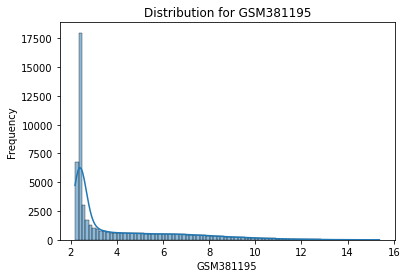

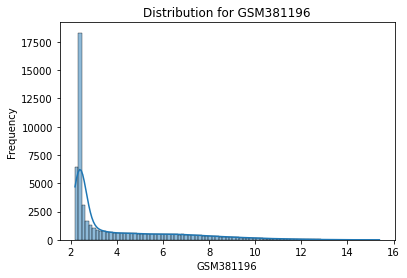

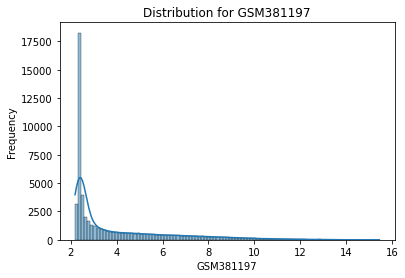

In [11]:
# Check and visualize missing values in metadata
print("Missing values in Gene Expression Data:")
print(df.isnull().sum())


# Plot distributions for a few gene columns
# The first three gene columns.
gene_columns = df.columns[1:4]
for gene in gene_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[gene], kde=True)
    plt.title(f"Distribution for {gene}")
    plt.xlabel(gene)
    plt.ylabel("Frequency")
    plt.show()

## Feature Selection: T-Test Approach

In [12]:
# 1. Drop rows where Response status is missing:
merged_df = merged_df.dropna(subset=['Response status'])

In [13]:
# 2. Mean (or median) impute the missing das28:
merged_df['disease activity score (das28)'] = merged_df['disease activity score (das28)'].fillna(
    merged_df['disease activity score (das28)'].mean()
)

Because Response status (Responder vs Non-Responder) is the target variable for supervised analysis, rows with missing response cannot be used for a typical classification or t-test approach. In this case as there are only 6 missing ~7% they are dropped and the das28 score for the remianing are imputed as this is a larger number of missing values.

In [14]:
# Define metadata columns
meta_cols = [
    'SampleID', 'Tissue', 'disease state', 'protocol',
    'disease activity score (das28)', 'Response status', 'Gender'
]

# Create a list of gene columns by excluding metadata columns from merged_df
gene_cols = [col for col in merged_df.columns if col not in meta_cols]

# Print the number of gene columns and the first few gene names as an example
print("Number of gene columns:", len(gene_cols))
print("Example gene columns:", gene_cols[:10])

Number of gene columns: 54675
Example gene columns: ['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at', '1316_at', '1320_at', '1405_i_at', '1431_at']


### T-Test Computation
For each gene, perform an independent t-test comparing Responders vs Non-Responders. (Ideally want to check normality assumptions, but in practice, t-tests are quite commonly used for initial screening.) From the distrubution plots above the data is skewed and not normally distributed so will log transform the data and perfomr Welch's t-test on the logged values.

In [15]:
print(merged_df['Response status'].unique())
print(merged_df['Response status'].value_counts())

['Responder' 'Non_responder']
Responder        24
Non_responder    22
Name: Response status, dtype: int64


In [16]:
import numpy as np
import pandas as pd
from scipy import stats

results = []

# Create boolean masks for the two groups
mask_responder = merged_df['Response status'] == 'Responder'
mask_nonresponder = merged_df['Response status'] == 'Non_responder'

for gene in gene_cols:
    # Extract raw values for each group and drop NaNs
    group1_raw = merged_df.loc[mask_responder, gene].dropna()
    group2_raw = merged_df.loc[mask_nonresponder, gene].dropna()
    
    # Apply a log transform. log1p(x) = log(1 + x) helps handle zeros.
    group1_log = np.log1p(group1_raw)
    group2_log = np.log1p(group2_raw)
    
    # Perform Welch's t-test (unequal variance) on the log-transformed values
    t_stat, p_val = stats.ttest_ind(group1_log, group2_log, equal_var=False)
    
    results.append({
        'Gene': gene,
        't_stat': t_stat,
        'p_val': p_val,
        # You can store the means in either raw or log scale (or both):
        'mean_responder_raw': np.mean(group1_raw),
        'mean_nonresponder_raw': np.mean(group2_raw),
        'mean_responder_log': np.mean(group1_log),
        'mean_nonresponder_log': np.mean(group2_log)
    })

results_df = pd.DataFrame(results)
results_df.head()

,Gene,t_stat,p_val,mean_responder_raw,mean_nonresponder_raw,mean_responder_log,mean_nonresponder_log
0,1007_s_at,1.604308,0.117659,2.536984,2.449938,1.261299,1.237849
1,1053_at,1.194278,0.238962,5.742642,5.543988,1.904475,1.876238
2,117_at,1.436401,0.158390,8.817240,8.545807,2.282324,2.253627
3,121_at,1.454650,0.158222,2.402159,2.349707,1.223277,1.208830
4,1255_g_at,0.307190,0.760169,2.327656,2.327472,1.202268,1.202213


In [17]:
results_df

,Gene,t_stat,p_val,mean_responder_raw,mean_nonresponder_raw,mean_responder_log,mean_nonresponder_log
0,1007_s_at,1.604308,0.117659,2.536984,2.449938,1.261299,1.237849
1,1053_at,1.194278,0.238962,5.742642,5.543988,1.904475,1.876238
2,117_at,1.436401,0.158390,8.817240,8.545807,2.282324,2.253627
3,121_at,1.454650,0.158222,2.402159,2.349707,1.223277,1.208830
4,1255_g_at,0.307190,0.760169,2.327656,2.327472,1.202268,1.202213
...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,-0.797506,0.432748,2.390708,2.394769,1.221037,1.222215
54671,AFFX-ThrX-M_at,1.387074,0.177043,2.398511,2.391537,1.223314,1.221282
54672,AFFX-TrpnX-3_at,2.100814,0.042042,2.397377,2.392622,1.223000,1.221602
54673,AFFX-TrpnX-5_at,1.252591,0.222847,2.386819,2.374057,1.219790,1.216116


### Multiple Testing Correction (Optional but Recommended)
When testing thousands of genes, multiple comparisons can inflate false positives. You often apply a multiple-testing correction like the Benjamini-Hochberg (FDR) method:

In [18]:
from statsmodels.stats.multitest import multipletests

# Apply the correction
_, corrected_pvals, _, _ = multipletests(results_df['p_val'].values, method='fdr_bh')
results_df['p_val_adj'] = corrected_pvals

### Sleecting Top 10 Genes

In [19]:
results_df.sort_values('p_val_adj', inplace=True)
top_10 = results_df.head(10)

In [20]:
print(top_10[['Gene', 'p_val', 'p_val_adj', 'mean_responder_log', 'mean_nonresponder_log']])

              Gene     p_val  p_val_adj  mean_responder_log  \
0        1007_s_at  0.117659   0.902809            1.261299   
27498  218213_s_at  0.029489   0.902809            2.126590   
27495    218210_at  0.303966   0.902809            1.469689   
27493    218208_at  0.143955   0.902809            2.055761   
50689    241440_at  0.096571   0.902809            1.215474   
27491  218206_x_at  0.122787   0.902809            1.612437   
27490  218205_s_at  0.402898   0.902809            2.639773   
27489  218204_s_at  0.387247   0.902809            1.939621   
27488    218203_at  0.179129   0.902809            1.931024   
27484  218199_s_at  0.223386   0.902809            1.686366   

       mean_nonresponder_log  
0                   1.237849  
27498               2.082807  
27495               1.424843  
27493               2.033112  
50689               1.222190  
27491               1.588206  
27490               2.643641  
27489               1.959051  
27488               1.89876

### Justification

Statistical Significance: These genes exhibit the lowest adjusted p-values, suggesting strong evidence of differential expression between responders vs. non-responders.

Effect Size: Looking at the mean expression in each group (mean_responder vs. mean_nonresponder). Large fold changes can support biological relevance.

Biological Plausibility: If any of the top genes are known to be implicated in immune pathways or the disease pathology, that further supports their relevance in predicting treatment response.

### Predictive Modelling

First lets look at the top 10 gene expressions

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Extract the top 10 gene names from the top_10 DataFrame
top_genes = top_10['Gene'].tolist()
print("Top genes selected:", top_genes)

# Step 2: Define the feature set by combining the top genes with the clinical score
selected_features = top_genes + ['disease activity score (das28)']
print("Selected features for modeling:", selected_features)

# Step 3: Subset merged_df (or merged_df_clean if you've already dropped rows with missing responses)
# Here, we'll drop rows with missing 'Response status' since that's our target.
merged_df_clean = merged_df.dropna(subset=['Response status'])

# Create the feature matrix X using the selected features
X = merged_df_clean[selected_features].copy()

# Step 4: Create the target vector y by converting Response status into binary values:
# 'Responder' becomes 1 and 'Non_responder' becomes 0.
y = merged_df_clean['Response status'].apply(lambda x: 1 if x == 'Responder' else 0)

# Step 5: Handle any missing values in X by imputing with the median of each column.
X = X.fillna(X.median())

# Step 6: Split the data into training and testing sets (e.g., 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Top genes selected: ['1007_s_at', '218213_s_at', '218210_at', '218208_at', '241440_at', '218206_x_at', '218205_s_at', '218204_s_at', '218203_at', '218199_s_at']
Selected features for modeling: ['1007_s_at', '218213_s_at', '218210_at', '218208_at', '241440_at', '218206_x_at', '218205_s_at', '218204_s_at', '218203_at', '218199_s_at', 'disease activity score (das28)']
Training set shape: (36, 11)
Testing set shape: (10, 11)


In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Build and train the Random Forest classifier using the training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Generate predictions and prediction probabilities on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {roc_auc:.4f}")

# Display the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Evaluation Metrics:
Accuracy:  0.5000
Precision: 0.4444
Recall:    1.0000
F1 Score:  0.6154
AUC-ROC:   0.3333

Confusion Matrix:
[[1 5]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.44      1.00      0.62         4

    accuracy                           0.50        10
   macro avg       0.72      0.58      0.45        10
weighted avg       0.78      0.50      0.42        10



The accuracy is only 50% (33% AUC) similar to guessing and is unlikly to be a good result this is likely due to the small smaple size lets look at the entire dataset.

## Full Data Predictive Model

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report)

# ---------------------------
# Step 1: Prepare the Data
# ---------------------------

# Drop rows with missing target values ("Response status")
merged_df_clean = merged_df.dropna(subset=['Response status']).copy()

# Create target variable: 1 for 'Responder', 0 for 'Non-Responder'
y = merged_df_clean['Response status'].apply(lambda x: 1 if x == 'Responder' else 0)

# Define metadata columns that are in the original metadata (excluding identifier and target)
metadata_predictors = ['Tissue', 'disease state', 'protocol', 'disease activity score (das28)', 'Gender']

# Extract metadata predictors
metadata_data = merged_df_clean[metadata_predictors].copy()

# One-hot encode categorical metadata (e.g., Tissue, disease state, protocol, Gender)
metadata_encoded = pd.get_dummies(metadata_data, drop_first=True)

# Identify gene expression columns: those not in metadata (and not the target/ID)
meta_cols = ['SampleID', 'Response status'] + metadata_predictors
gene_cols = [col for col in merged_df_clean.columns if col not in meta_cols]

# Extract gene expression data and fill missing values with median (if any)
gene_data = merged_df_clean[gene_cols].copy()
gene_data = gene_data.fillna(gene_data.median())

# Standardize the gene expression data before applying PCA
scaler = StandardScaler()
gene_scaled = scaler.fit_transform(gene_data)

# Reduce gene expression dimensionality via PCA (e.g., to 10 principal components)
pca = PCA(n_components=10, random_state=42)
gene_pca = pca.fit_transform(gene_scaled)

# Create a DataFrame for the PCA components
gene_pca_df = pd.DataFrame(gene_pca, columns=[f'PC{i+1}' for i in range(gene_pca.shape[1])],
                           index=merged_df_clean.index)

# Combine the processed metadata and PCA gene components into our feature matrix X
X = pd.concat([metadata_encoded, gene_pca_df], axis=1)
X = X.fillna(X.median())

# Optional: Display the shape and first few rows of X
print("Feature matrix shape:", X.shape)
display(X.head())

# ---------------------------
# Step 2: Split Data for Modeling
# ---------------------------

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# ---------------------------
# Step 3: Baseline Model - Logistic Regression
# ---------------------------

baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)
y_proba_baseline = baseline_model.predict_proba(X_test)[:,1]

print("Baseline Model (Logistic Regression) Evaluation:")
print("Accuracy:  ", accuracy_score(y_test, y_pred_baseline))
print("Precision: ", precision_score(y_test, y_pred_baseline))
print("Recall:    ", recall_score(y_test, y_pred_baseline))
print("F1 Score:  ", f1_score(y_test, y_pred_baseline))
print("AUC-ROC:   ", roc_auc_score(y_test, y_proba_baseline))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))

# ---------------------------
# Step 4: Model 2 - Random Forest Classifier
# ---------------------------

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("\Model 2 (Random Forest) Evaluation:")
print("Accuracy:  ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall:    ", recall_score(y_test, y_pred_rf))
print("F1 Score:  ", f1_score(y_test, y_pred_rf))
print("AUC-ROC:   ", roc_auc_score(y_test, y_proba_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Feature matrix shape: (46, 12)


,disease activity score (das28),Gender_Male,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,4.51,1,18.224959,87.900695,0.852846,85.102656,-70.100103,18.924071,-73.524431,-18.530101,-23.566299,36.646982
1,6.04,0,-87.723032,-15.126137,-38.959687,9.583589,3.198406,-39.563736,-28.895594,71.240492,11.217455,1.799187
2,5.92,1,-25.589361,44.947679,-30.699657,0.158739,-27.568975,3.749690,-23.908747,14.464567,-49.625379,2.200131
4,6.00,0,35.577029,-99.528494,-30.670794,1.308607,1.828565,-21.518058,9.735258,0.261557,10.594313,-4.060735
5,5.20,0,97.544937,-65.333635,-67.234321,-13.716810,20.382701,15.540536,3.276925,28.791739,2.854819,0.761084


Training set shape: (36, 12)
Testing set shape: (10, 12)
Baseline Model (Logistic Regression) Evaluation:
Accuracy:   0.6
Precision:  0.5
Recall:     0.75
F1 Score:   0.6
AUC-ROC:    0.625

Confusion Matrix:
[[3 3]
 [1 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

\Model 2 (Random Forest) Evaluation:
Accuracy:   0.5
Precision:  0.42857142857142855
Recall:     0.75
F1 Score:   0.5454545454545454
AUC-ROC:    0.4791666666666667

Confusion Matrix:
[[2 4]
 [1 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.43      0.75      0.55         4

    accuracy                           0

**Logistic Regression (Baseline Model):**

- **Accuracy:** 60%  
- **Precision:** 50%  
- **Recall:** 75%  
- **F1 Score:** 60%  
- **AUC-ROC:** 0.625  
- **Confusion Matrix:**  
  - True Negatives (Class 0): 3  
  - False Positives (Class 0 predicted as Class 1): 3  
  - False Negatives (Class 1 predicted as Class 0): 1  
  - True Positives (Class 1): 3

**Random Forest (Model 2):**

- **Accuracy:** 50%  
- **Precision:** ~43%  
- **Recall:** 75%  
- **F1 Score:** ~54.5%  
- **AUC-ROC:** 0.479  
- **Confusion Matrix:**  
  - True Negatives: 2  
  - False Positives: 4  
  - False Negatives: 1  
  - True Positives: 3

---

### Analysis

1. **Model Performance Comparison:**
   - **Accuracy:** The logistic regression model correctly classified 60% of the test samples, while the random forest model achieved only 50% accuracy.
   - **Precision and Recall:**  
     Both models achieved a recall of 75% for identifying responders, which is important clinically (to minimize the chance of missing a patient who would benefit from treatment). However, the logistic regression model has a higher precision (50% vs. ~43%), meaning that among the cases predicted as responders, a larger proportion are true responders.
   - **AUC-ROC:**  
     The AUC-ROC for logistic regression is 0.625, indicating moderate discriminative ability. In contrast, the random forest’s AUC-ROC of 0.479 is essentially at chance level, suggesting that it is less capable of distinguishing between responders and non-responders across thresholds.

2. **Confusion Matrix Insights:**
   - For logistic regression, 3 non-responders were correctly identified while 3 were misclassified. For responders, 3 were correctly identified and only 1 was missed.  
   - The random forest model misclassified more non-responders (only 2 correctly identified out of 6) even though it maintained the same recall for responders.
  
3. **Trade-Offs and Clinical Relevance:**
   - **Recall (Sensitivity):**  
     In a clinical setting, a high recall is often prioritized because missing a true responder (a false negative) can be particularly harmful if that patient is denied a potentially effective treatment.
   - **Precision:**  
     Precision is important to avoid overtreatment or unnecessary interventions. Although both models share the same recall, the logistic regression model has a better precision, meaning it produces fewer false positives.
   - **AUC-ROC:**  
     The higher AUC-ROC for logistic regression indicates better overall performance in ranking cases by their likelihood of being responders. This is crucial when determining thresholds for decision-making.
  
4. **Conclusion:**
   - The logistic regression model outperforms the random forest model in this evaluation, with higher overall accuracy, precision, and AUC-ROC while maintaining a high recall.  
   - Given the clinical context—where it is essential to identify true responders while minimizing false positives—the logistic regression model is preferable based on these results.

---

## Explanability and featrure importance

/Users/grahamellinson/miniforge3/lib/python3.9/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


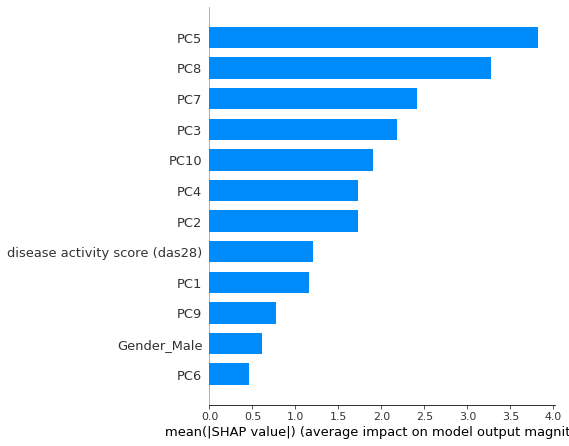

In [24]:
import shap
# For linear models, we can use the LinearExplainer
explainer = shap.LinearExplainer(baseline_model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Create a summary plot (bar plot) showing average absolute SHAP values for each feature.
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

This SHAP summary bar plot shows the average contribution (magnitude of impact) each feature has on the model’s output. For example, if the clinical variable “disease activity score (das28)” has a high SHAP value, it suggests that clinical severity plays an important role in predicting treatment response. Similarly, if one or more of the PCA components (e.g., PC1, PC2) rank highly, it indicates that overall gene expression patterns (captured by these components) also strongly influence predictions.

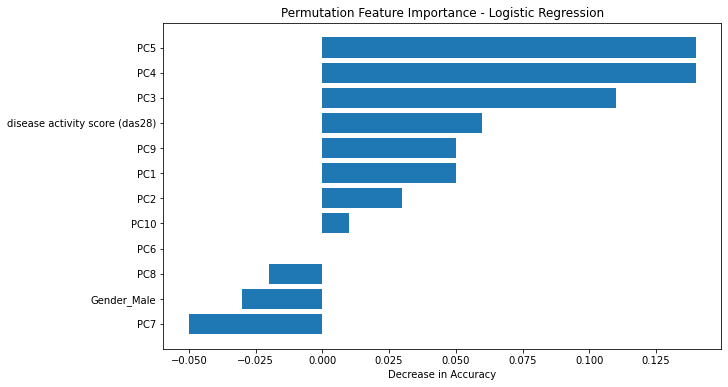

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute permutation importance on the test set (using 10 repeats for stability)
result = permutation_importance(baseline_model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Get mean importances and sort them
importances = result.importances_mean
sorted_idx = np.argsort(importances)

# Plot the permutation importances
plt.figure(figsize=(10, 6))
plt.barh(np.array(X_test.columns)[sorted_idx], importances[sorted_idx])
plt.xlabel("Decrease in Accuracy")
plt.title("Permutation Feature Importance - Logistic Regression")
plt.show()

Permutation importance measures how much the model’s accuracy decreases when a given feature is randomly shuffled. A larger decrease indicates that the feature is more important for the prediction task. For example, if “disease activity score (das28)” shows a large drop in accuracy when permuted, then it is critical to the model’s predictions. Similarly, high importance for any of the PCA components suggests that gene expression patterns captured by that component are influential—even though they represent a combination of genes.

In [26]:
# For PC4 (index 3) 
pc4_index = 3
pc4_loadings = pca.components_[pc4_index]

# Create a DataFrame with gene names and their loadings for PC4
loadings_pc4 = pd.DataFrame({
    'gene': gene_cols,
    'loading': pc4_loadings
})

# Rank by the absolute value of the loading
loadings_pc4['abs_loading'] = loadings_pc4['loading'].abs()
loadings_pc4 = loadings_pc4.sort_values(by='abs_loading', ascending=False)

print("Top contributing genes for PC4:")
print(loadings_pc4.head(10))


# For PC5 (index 4)
pc5_index = 4
pc5_loadings = pca.components_[pc5_index]

loadings_pc5 = pd.DataFrame({
    'gene': gene_cols,
    'loading': pc5_loadings
})
loadings_pc5['abs_loading'] = loadings_pc5['loading'].abs()
loadings_pc5 = loadings_pc5.sort_values(by='abs_loading', ascending=False)

print("\nTop contributing genes for PC5:")
print(loadings_pc5.head(10))

# For PC8 (index 7)
pc8_index = 7
pc8_loadings = pca.components_[pc8_index]

# Create a DataFrame with gene names and their loadings for PC8
loadings_pc8 = pd.DataFrame({
    'gene': gene_cols,
    'loading': pc8_loadings
})

# Compute the absolute loading values and sort by them
loadings_pc8['abs_loading'] = loadings_pc8['loading'].abs()
loadings_pc8 = loadings_pc8.sort_values(by='abs_loading', ascending=False)

print("Top contributing genes for PC8:")
print(loadings_pc8.head(10))

Top contributing genes for PC4:
              gene   loading  abs_loading
35236    225980_at -0.015855     0.015855
10038  200097_s_at -0.015645     0.015645
11676  202228_s_at -0.015336     0.015336
11221    201773_at -0.015332     0.015332
36207    226952_at -0.015253     0.015253
36111    226856_at  0.015189     0.015189
40676  231422_x_at  0.015177     0.015177
33877    224618_at -0.015167     0.015167
22991    213691_at  0.015160     0.015160
42421  233168_s_at  0.014999     0.014999

Top contributing genes for PC5:
               gene   loading  abs_loading
43903     234654_at  0.018593     0.018593
5266   1560281_a_at  0.018497     0.018497
2936     1556333_at  0.018384     0.018384
14602   205155_s_at  0.018375     0.018375
45196     235947_at  0.018321     0.018321
30428     221145_at  0.018296     0.018296
46933     237684_at  0.018278     0.018278
9005     1569054_at  0.018276     0.018276
29469     220185_at  0.018270     0.018270
6414     1562107_at  0.018243     0.018243


Interpretation of the **top-contributing genes** for **PC4**, **PC5**, and **PC8**, which were the principal components (PCs) most relevant in distinguishing treatment response.

---

## 1. What Does “Top Contributing Genes” Mean?

- Each principal component (PC) is effectively a **linear combination** of all the genes in the dataset.
- The **loading** (or weight) indicates how strongly each gene influences that PC. A larger absolute loading value means the gene has a bigger impact on shaping the PC’s direction.
- **Sign** (positive or negative) shows the direction of the association:  
  - A positive loading means that as the gene’s expression increases, the PC’s score also increases (and vice versa).  
  - A negative loading implies the opposite (higher expression pushes the PC’s score down).

So, the genes listed for each PC are those that **dominate** that dimension of variation in the data.

---

## 2. PC4, PC5, PC8 in Context

From the feature-importance analysis (SHAP and Permutation Importance), **PC4**, **PC5**, and **PC8** surfaced as influential in predicting treatment response. That means the gene-expression patterns captured by these PCs help **differentiate responders from non-responders**.

1. **PC4**  
   - Genes like `225980_at`, `200097_s_at`, and `202228_s_at` (top negative loadings) and `226856_at`, `231422_x_at` (top positive loadings) drive this axis.  
   - The fact that several have negative loadings suggests a coordinated cluster of genes whose higher expression levels *decrease* a sample’s PC4 score, potentially indicating an underlying biological pathway that is inversely correlated with response.

2. **PC5**  
   - Its top loadings are slightly higher in magnitude (e.g., ~0.018), indicating PC5 is strongly influenced by genes like `234654_at`, `1560281_a_at`, etc.  
   - Because **PC5** was the most important PC in your model’s explanation, these genes likely represent a **key transcriptional signature** separating responders from non-responders.

3. **PC8**  
   - Genes such as `215880_at`, `238244_at`, `1561685_a_at` have large positive loadings.  
   - Though not as dominant as PC5 in the global model, PC8 still meaningfully contributes to distinguishing the response pattern.

---

## 3. Biological/Clinical Interpretation

- **Gene IDs to Biological Pathways**: The “xxx_at” notation typically refers to probe sets from microarray experiments (e.g., Affymetrix). Mapping these probe IDs to known gene symbols, pathways, or functional annotations can reveal if these genes are related to immune regulation, inflammatory processes, or other mechanisms relevant to your disease or drug action.
- **Positive vs. Negative Groups**: You may find that some top positive-loading genes are part of one immune pathway, while negative loadings cluster around a different pathway. This can suggest a **biological “tug-of-war”**—where upregulation in one pathway plus downregulation in another might characterize responders (or non-responders).

---

## 4. Next Steps

1. **Annotate and Validate**: Identify each gene’s official name, known function, and any literature linking it to your disease area.  
2. **Pathway/GO Enrichment**: Check if these top genes (particularly those in PC5) are enriched for certain biological processes—this can provide more mechanistic insight.  
3. **Targeted Biomarker Development**: If a particular set of genes emerges repeatedly, they might form a candidate biomarker panel to predict response more directly than using all principal components.

---

## 5. Main Takeaway

- **PC4**, **PC5**, and **PC8** are crucial principal components in predicting treatment response because they capture distinct gene-expression patterns that differentiate responders from non-responders.
- The **top contributing genes** listed here are the biggest shapers of those PCs. By examining their functions, you gain biological insight into **why** these components matter—potentially revealing new therapeutic targets or biomarkers for patient stratification.